In [21]:
import os, math

from PIL import Image

import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv(os.path.join(".DATA", "source.csv"))

df.sample(15)

context  video_id  out_of_distribution  zoom  from_internet  \
6198     LAB       215                    0     0              0   
3593   FIELD       106                    0     0              0   
1648   FIELD       392                    0     0              0   
4336   FIELD       162                    0     0              0   
909      LAB       131                    0     0              0   
3694   FIELD       100                    0     0              0   
6123     LAB       221                    0     0              0   
6501     LAB       262                    0     0              0   
968      LAB       126                    0     0              0   
1372     LAB        79                    0     0              0   
1016     LAB       131                    0     0              0   
728    FIELD        18                    0     0              0   
2577     LAB       361                    0     0              0   
721    FIELD        11                    0     0              0   
842      LAB       131                    0     0              0   

                                     image_path       image_class  
6198    Diseases/Yellow Leaf/Yellow Leaf113.jpg       Yellow Leaf  
3593         Diseases/Grassy shoot/image102.jpg      Grassy shoot  
1648          Diseases/Brown Spot/image1554.jpg        Brown Spot  
4336          Diseases/Sett Rot/Sett Rot552.jpg          Sett Rot  
909      Diseases/Banded Chlorosis/image201.jpg  Banded Chlorosis  
3694  Diseases/Pokkah Boeng/Pokkah Boeng238.jpg      Pokkah Boeng  
6123    Diseases/Yellow Leaf/Yellow Leaf209.jpg       Yellow Leaf  
6501    Diseases/Yellow Leaf/Yellow Leaf632.jpg       Yellow Leaf  
968      Diseases/Banded Chlorosis/image111.jpg  Banded Chlorosis  
1372            Diseases/BrownRust/image111.jpg         BrownRust  
1016     Diseases/Banded Chlorosis/image202.jpg  Banded Chlorosis  
728                 Healthy Leaves/image311.jpg    Healthy Leaves  
2577           Diseases/Brown Spot/image761.jpg        Brown Spot  
721                 Healthy Leaves/image196.jpg    Healthy Leaves  
842      Diseases/Banded Chlorosis/image204.jpg  Banded Chlorosis

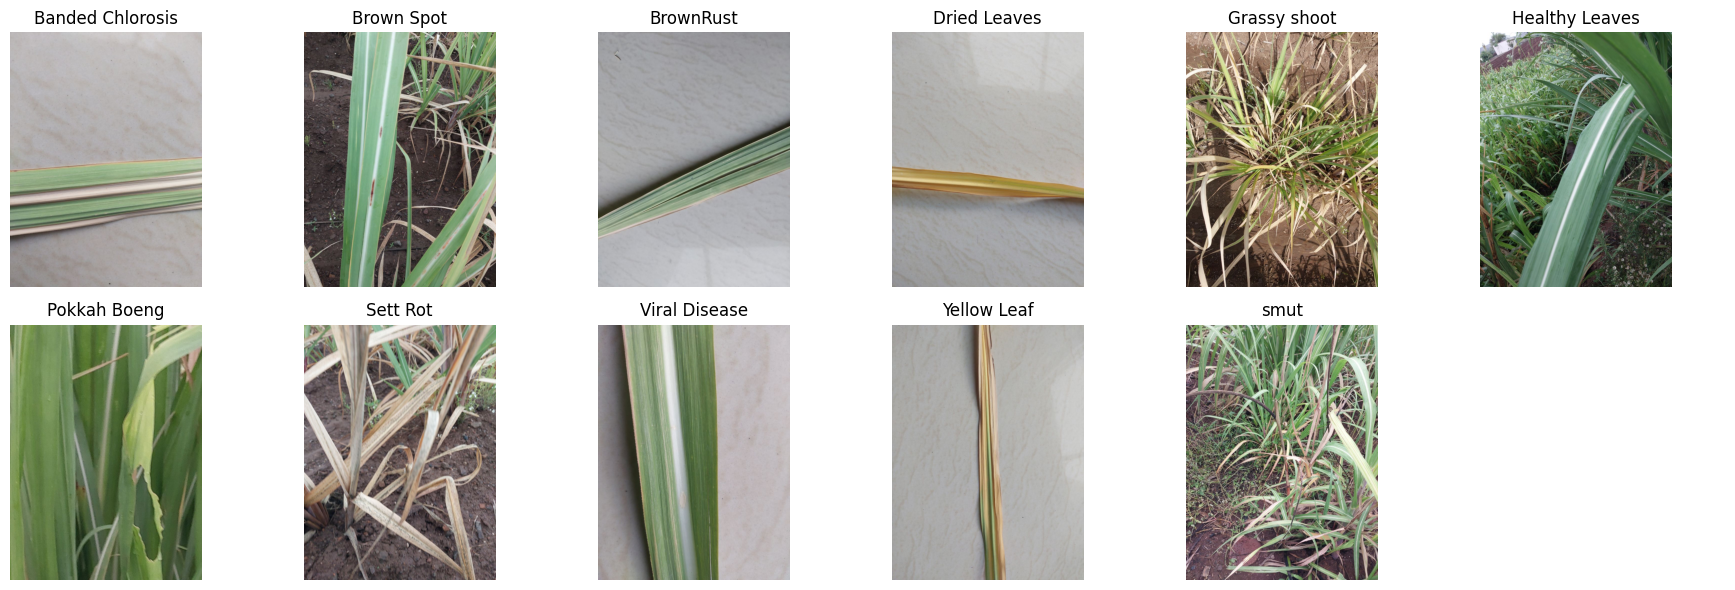

In [23]:
sampled = df.groupby("image_class").sample(1, random_state=42)

rows = 2
cols = math.ceil(len(sampled) / rows)

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))

axes = axes.flatten()

for ax, (_, row) in zip(axes, sampled.iterrows()):
    img = plt.imread(os.path.join(".DATA", "SOURCE", row['image_path']))
    ax.imshow(img)
    ax.set_title(row['image_class'])
    ax.axis('off')

for ax in axes[len(sampled):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

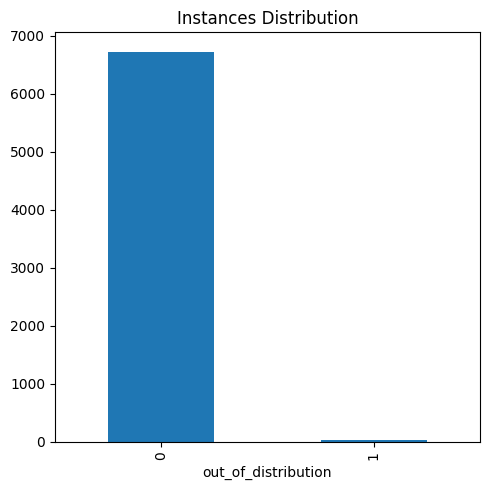

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=False)

df["out_of_distribution"].value_counts(normalize=False).plot(kind="bar", title="Instances Distribution", ax=ax)

plt.tight_layout()

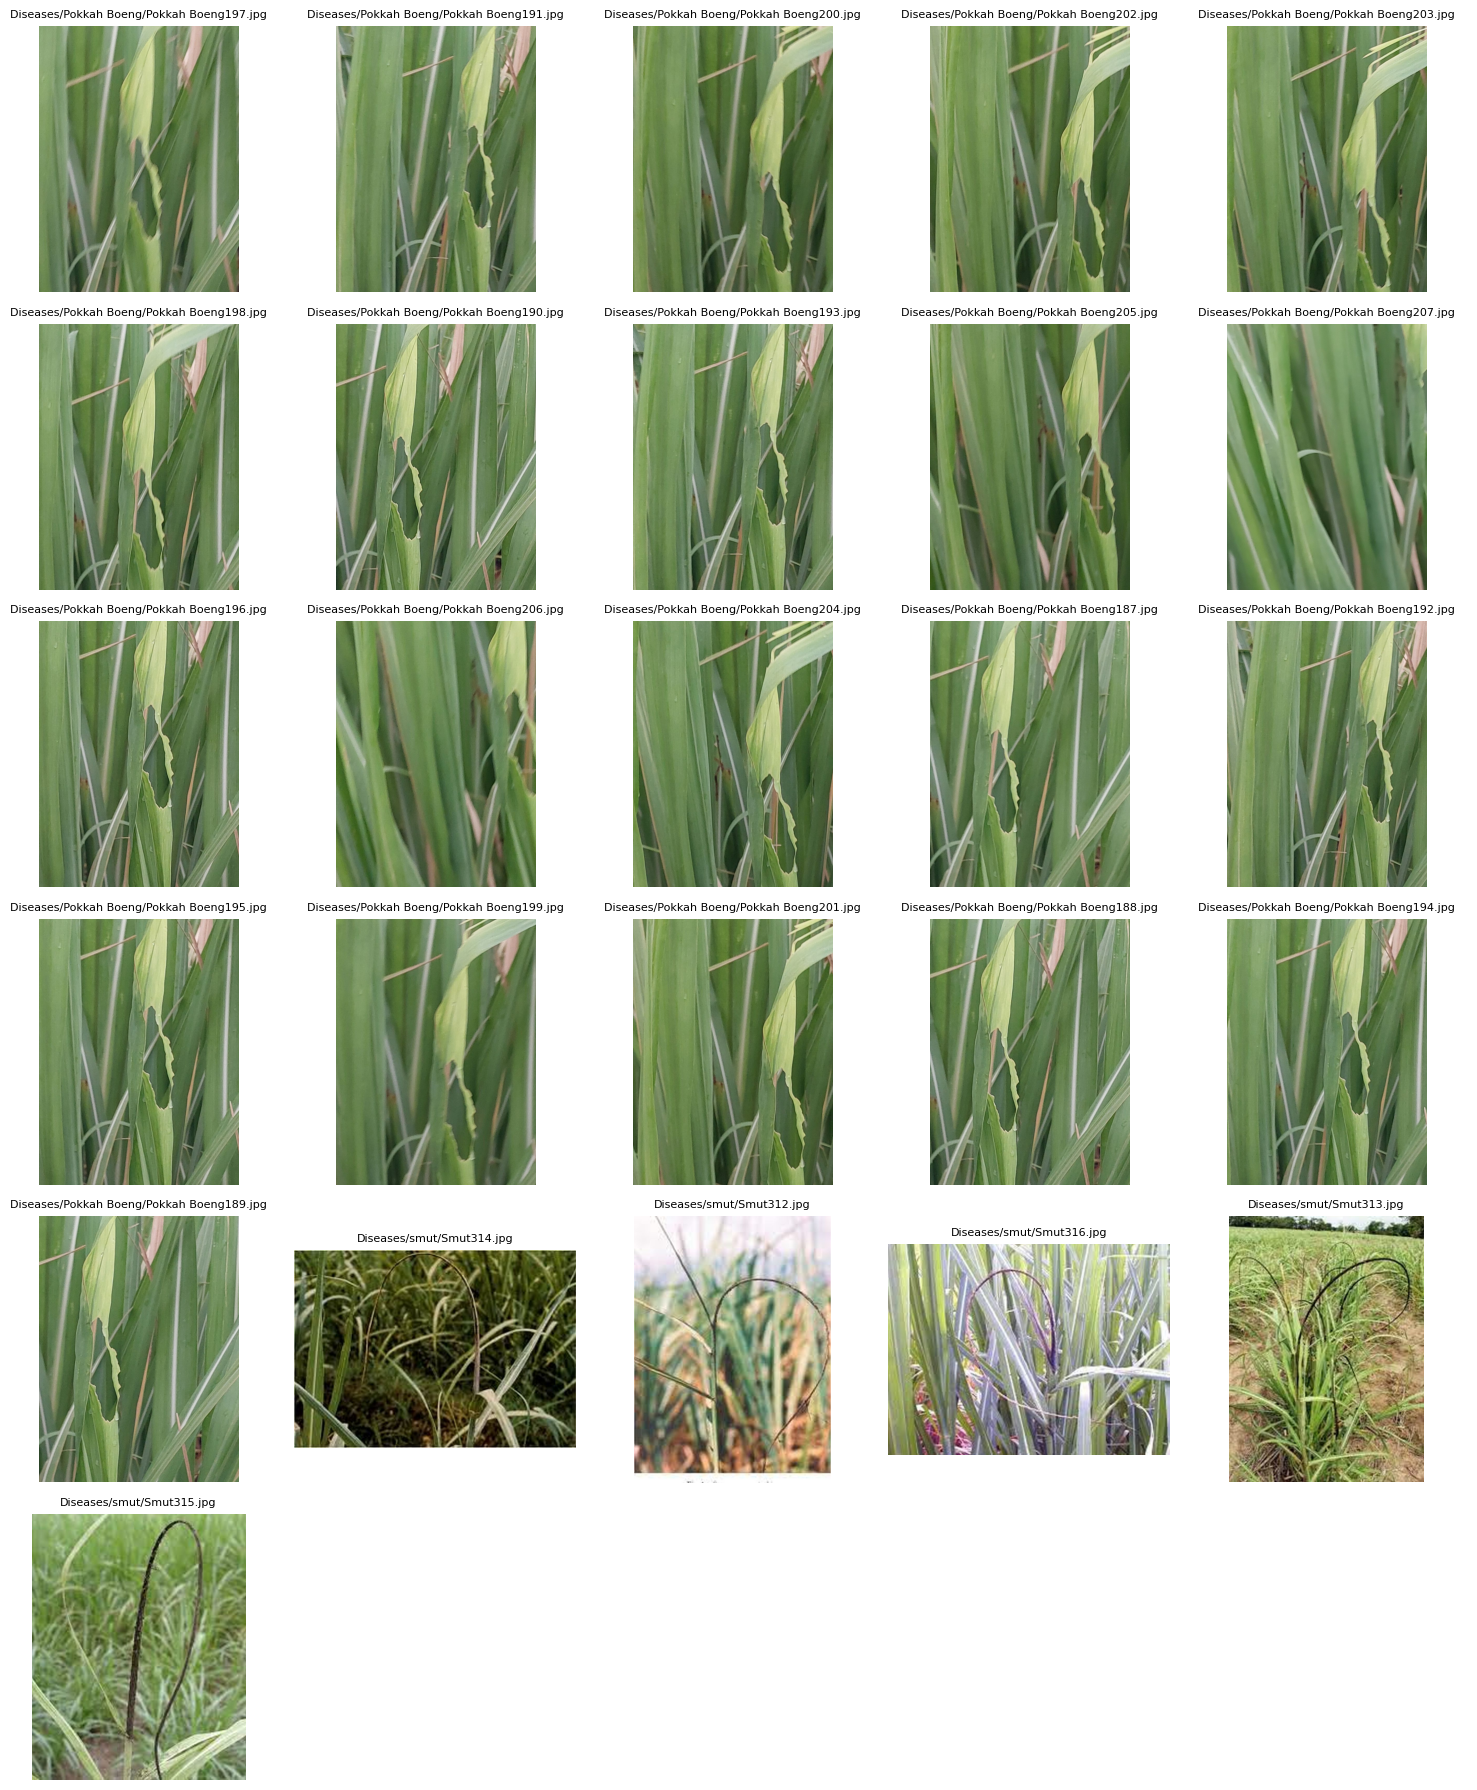

In [25]:
ood_df = df[df["out_of_distribution"] == 1]

cols = 5
rows = (len(ood_df) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

axes = axes.flatten()

for ax, (_, row) in zip(axes, ood_df.iterrows()):
    img = Image.open(os.path.join(".DATA", "SOURCE", row["image_path"]))
    ax.imshow(img)
    ax.set_title(row["image_path"], fontsize=8)
    ax.axis("off")

for ax in axes[len(ood_df):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [26]:
df = df[df["out_of_distribution"] == 0]

In [27]:
def plot_images_distribution(df: pd.DataFrame, include_context: bool = False, title: str ="Class Distribution"):
    dist_full = df["image_class"].value_counts().sort_index()
    dist_videos = df.groupby("image_class")["video_id"].nunique()
    dist_context = df["context"].value_counts().sort_index()

    n_plots = 3 if include_context else 2

    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 5), sharey=False)

    fig.suptitle(title)

    for data, ax, title in [
        (dist_full, axes[0], "Frames"),
        (dist_videos, axes[1], "Videos"),
        (dist_context, axes[2], "Context") if include_context else (dist_context, 0, "Context")
    ]:
        if title == "Context" and not include_context:
            continue

        data.plot(kind="bar", ax=ax, title=title, legend=False)

        mean_val = data.mean()
        min_val = data.min()

        line_mean = ax.axhline(mean_val, color="r", linestyle="--")
        line_min  = ax.axhline(min_val,  color="g", linestyle=":")

        x_pos = len(data) - 0.25
        ax.text(x_pos, mean_val, f"{mean_val:.1f}", color="r", va="bottom", ha="left")
        ax.text(x_pos, min_val,  f"{min_val}", color="g", va="bottom", ha="left")

        ax.set_xlabel("Class")
        ax.set_ylabel("Count")

        ax.legend([line_mean, line_min], [f"mean = {mean_val:.1f}", f"min = {min_val}"])

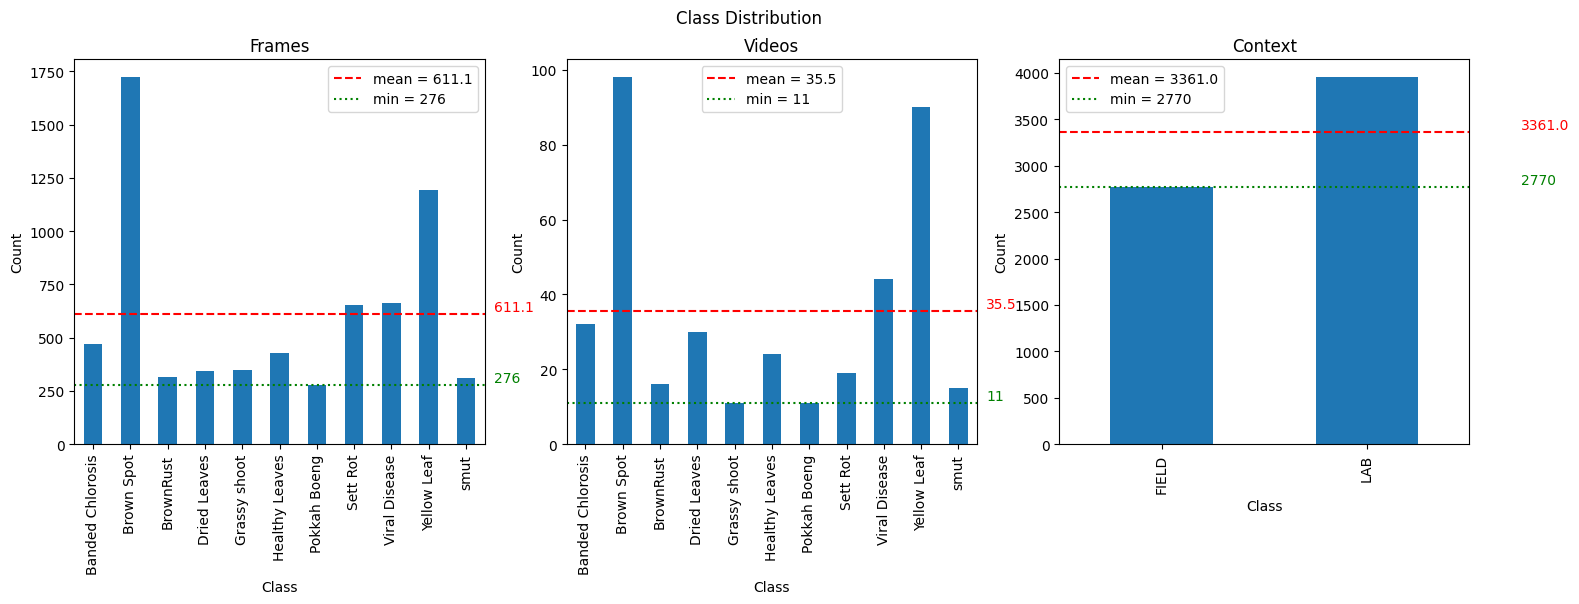

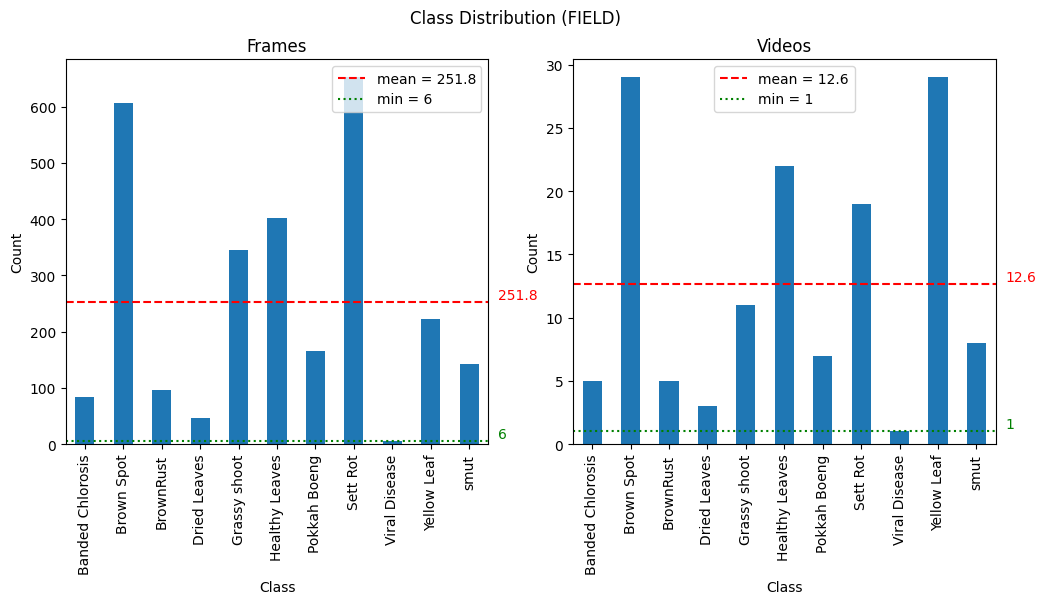

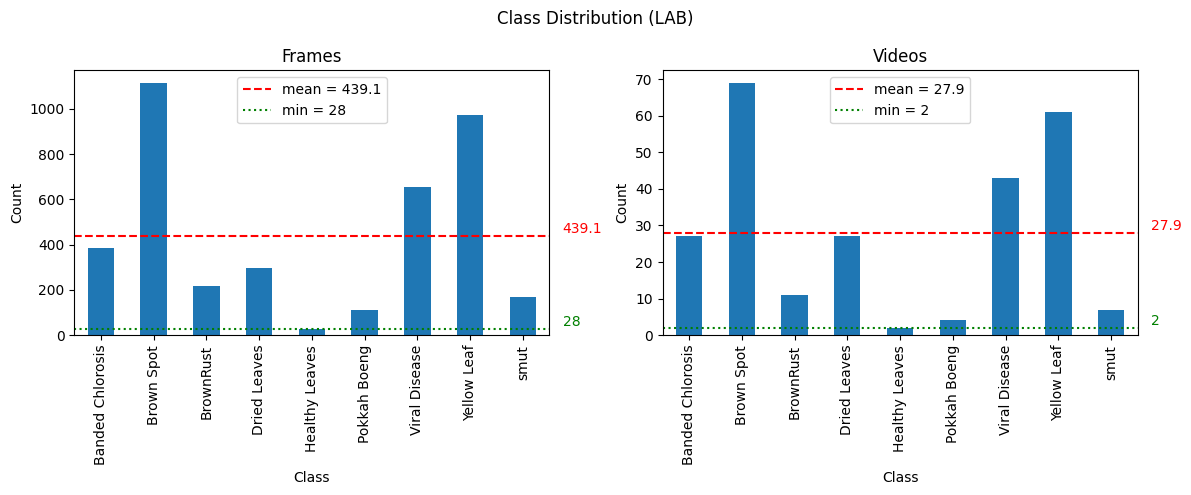

In [28]:
plot_images_distribution(df=df, include_context=True)
plot_images_distribution(df=df[df["context"] == "FIELD"], include_context=False, title="Class Distribution (FIELD)")
plot_images_distribution(df=df[df["context"] == "LAB"], include_context=False, title="Class Distribution (LAB)")

plt.tight_layout()
plt.show()

In [29]:
def plot_frames_per_video_stats(df: pd.DataFrame, title="Frames Per Video Stats"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

    fig.suptitle(title)

    axes = axes.flatten()

    df["video_id"].value_counts().plot(kind="hist", bins=20, title="Frequency of Frames per Video", ax=axes[0])
    df["video_id"].value_counts().plot(kind="box", title="Frames per Video Distribution", ax=axes[1])

    axes[2].text(0.1, 0.5, df["video_id"].value_counts().describe(), fontsize=14, family='monospace')
    axes[2].set_title("Frames per Video Stats")
    axes[2].axis('off')

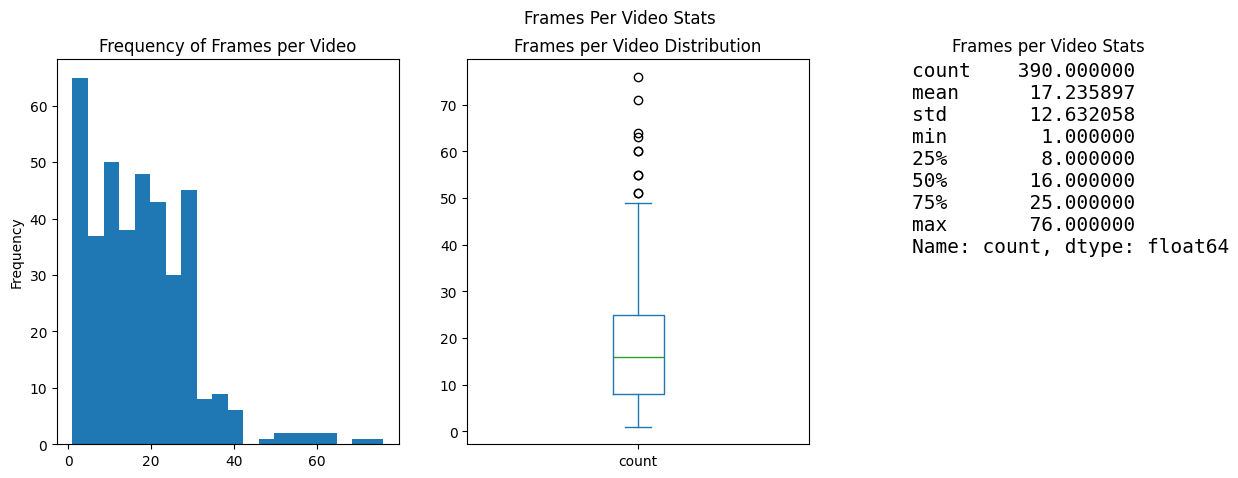

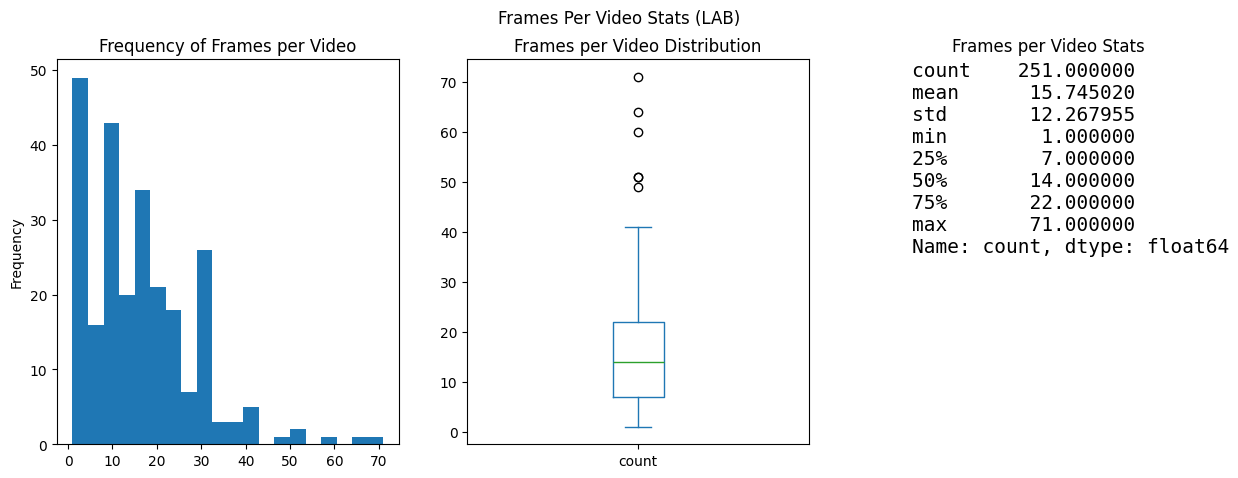

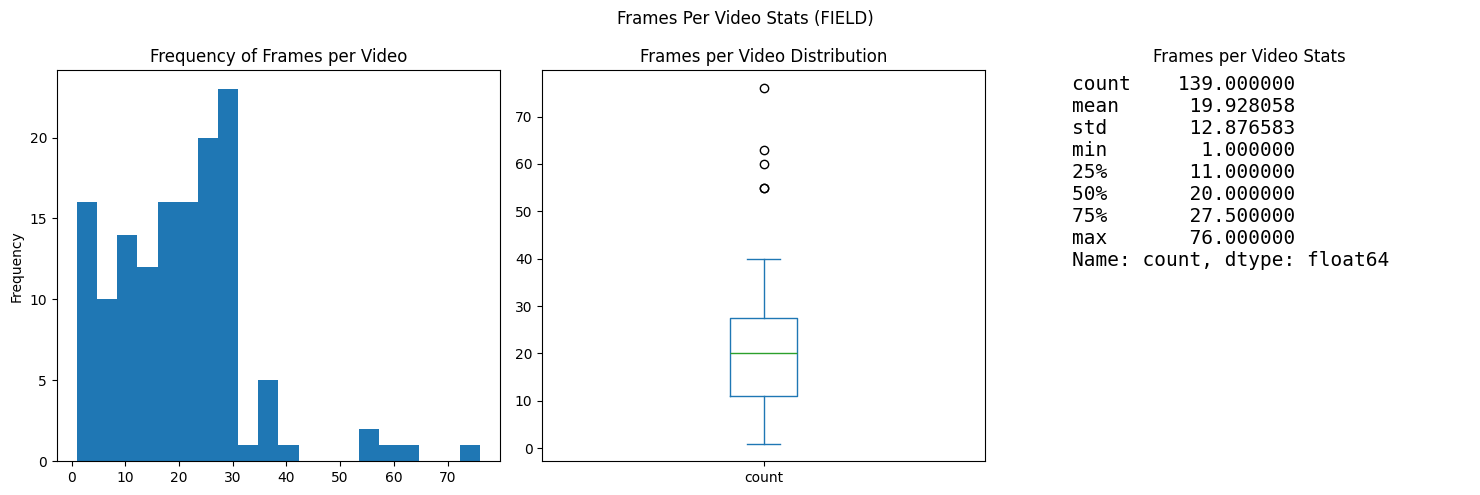

In [30]:
plot_frames_per_video_stats(df=df)
plot_frames_per_video_stats(df=df[df["context"] == "LAB"], title="Frames Per Video Stats (LAB)")
plot_frames_per_video_stats(df=df[df["context"] == "FIELD"], title="Frames Per Video Stats (FIELD)")
plt.tight_layout()
plt.show()